In [8]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import folium
from folium import plugins
import branca.colormap as cmp
import leafmap.foliumap as leafmap
import pysal
from pysal.viz import splot
from splot.esda import plot_moran
from src.utils import *
from src.plots import *
from src.analysis import *

In [2]:
# Noise data
NOISE = gpd.read_file('data/NOISE.zip')
NOISE = pd.concat([NOISE.iloc[[-1]], NOISE.iloc[:-1]]).reset_index(drop = True)

# Districts data
DISTRICTS = gpd.read_file('data/DISTRICTS.zip')

# Parks data
PARKS = gpd.read_file('data/PARKS.zip')
PARKS = PARKS.drop(columns = ['INTERPRVEK', 'KAPITOLA', 'HODNOCENI_', 'MISTA'], axis = 1)

# Green areas data
GREEN_AREAS = gpd.read_file('data/GREEN_AREAS.zip')

In [3]:
district_name = 'Praha 14'
noise_in_district, selected_district = filter_poligon(NOISE, DISTRICTS, district_name)
parks_in_district, _ = filter_poligon(PARKS, DISTRICTS, district_name)
green_areas_in_district, _ = filter_poligon(GREEN_AREAS, DISTRICTS, district_name)

In [5]:
# def noise_legend(df = noise):
#     legend = dict()
#     for color, row in zip(colorbar(len(df)), df.iterrows()):
#         legend[f"{int(row[1]['DB_LO'])}-{int(row[1]['DB_HI'])}"] = color
#     return legend

In [4]:
m = folium.Map(location = [50.08804, 14.42076], zoom_start = 12)
# m = leafmap.Map(center = [50.08804, 14.42076], zoom = 12)

folium.GeoJson(
    selected_district,
    name = 'Districts',
    style_function = lambda x: {'color': 'black', 
                                'fillColor': 'lightblue', 
                                'weight': 2, 
                                'fillOpacity': 0.4},
    tooltip = folium.GeoJsonTooltip(fields = ['NAZEV_MC'], aliases = ['District']),
).add_to(m)

folium.GeoJson(
    noise_in_district,
    name = 'Noise',
    style_function = lambda feature: style_function(feature, noise_in_district, 'DB_LO', 'turbo'),
    tooltip = folium.GeoJsonTooltip(fields = ['DB_LO', 'DB_HI'], aliases = ['DB_LO', 'DB_HI']),
).add_to(m)

folium.GeoJson(
    parks_in_district,
    name = 'Parks',
    style_function = lambda x: {'color': 'black', 
                                'fillColor': 'darkgreen', 
                                'weight': 2, 
                                'fillOpacity': 0.4},
    tooltip = folium.GeoJsonTooltip(fields = ['NAZEV'], aliases = ['Park name']),
).add_to(m)

folium.GeoJson(
    green_areas_in_district,
    name = 'Green areas',
    style_function = lambda x: {'color': 'black', 
                                'fillColor': 'darkgreen', 
                                'weight': 2, 
                                'fillOpacity': 0.4},
    # tooltip = folium.GeoJsonTooltip(fields = ['NAZEV'], aliases = ['Park name']),
).add_to(m)



step = cmp.StepColormap(
colorbar(18),
vmin = 0, 
vmax = 85,
caption = 'Noise level'
)
m.add_child(step)

# m.add_legend(title = 'Noise Level', legend_dict = noise_legend())
folium.LayerControl().add_to(m)

m

## Data analysis

In [5]:
noise = NOISE.copy()

In [10]:
stats = noise_basic_stats(noise, DISTRICTS)

In [11]:
stats

District       Mean        Std   Min        Q25     Median  \
0          Praha-Čakovice  42.228425   8.636961   0.0  36.112924  41.132107   
1                Praha 14  52.113554   9.329426   0.0  46.139757  51.797540   
2                Praha 12  43.908323   9.028624   0.0  37.270289  42.922903   
3                Praha 17  48.523419   9.369194   0.0  41.910683  47.456041   
4           Praha-Ďáblice  49.246946   8.495927   0.0  42.456714  48.130632   
5                Praha 10  50.616471  10.878406   0.0  43.935832  50.272191   
6           Praha-Šeberov  48.130829   7.575172   5.0  42.484862  47.405585   
7             Praha-Újezd  48.220260   8.620803   5.0  41.751615  46.432838   
8             Praha-Libuš  44.338703   8.296381   0.0  39.068234  43.804945   
9        Praha-Březiněves  43.896725   9.179993   5.0  37.577252  43.765433   
10                Praha 2  51.938819  11.634024   0.0  42.602461  50.579052   
11               Praha 13  47.770447  10.910433   0.0  41.311522  47.475477   
12         Praha-Řeporyje  44.564030  12.177856   0.0  37.369774  45.758393   
13                Praha 1  47.052007  12.963416   0.0  38.345354  45.372943   
14                Praha 6  46.200733  10.831212   0.0  38.885235  45.763242   
15                Praha 9  52.163182  11.331422   0.0  46.244975  52.284921   
16          Praha-Suchdol  40.641235   9.129749   0.0  34.466821  39.940062   
17     Praha-Dolní Chabry  41.134593   8.961874   0.0  36.054098  40.958053   
18        Praha-Petrovice  49.982607   7.609899   0.0  44.005545  49.118842   
19         Praha-Slivenec  48.111139   8.618219  25.0  41.813084  47.550943   
20            Praha-Vinoř  42.750578   6.866091   0.0  37.716429  41.806521   
21           Praha-Benice  39.552534   5.937362   0.0  35.152929  38.533410   
22               Praha 18  46.498207  12.179656   0.0  40.441660  45.943280   
23        Praha-Kolovraty  44.477733   7.748352   5.0  38.408470  43.446015   
24               Praha 11  50.161948   9.944238   0.0  43.098414  49.383691   
25         Praha-Zbraslav  50.721692   7.909510   0.0  45.060037  50.280074   
26               Praha 15  48.132478   9.955707   0.0  42.163414  47.465591   
27                Praha 4  51.300691  10.062368   0.0  44.563499  51.032463   
28                Praha 5  47.719307   9.875310   0.0  40.893455  46.594428   
29               Praha 20  51.179369   9.946184   0.0  45.743046  50.889717   
30                Praha 3  49.712209  10.663691   0.0  41.922225  48.871773   
31    Praha-Velká Chuchle  47.751988  10.908024   0.0  38.555698  46.731260   
32  Praha-Dolní Počernice  52.319848   7.465805   0.0  46.739176  51.313867   
33  Praha-Přední Kopanina  41.620984   8.755482   5.0  34.945320  41.859826   
34  Praha-Dolní Měcholupy  47.235416   7.961181   0.0  42.360743  46.450106   
35         Praha-Křeslice  42.216190   5.762830   0.0  37.655934  41.671218   
36            Praha-Troja  47.243020   5.858326   0.0  42.649978  46.544334   
37                Praha 7  52.667775  10.368744   0.0  47.223730  53.138785   
38          Praha-Lochkov  48.168960   8.579557  30.0  41.609750  47.061007   
39         Praha-Nebušice  40.526342   8.373386   0.0  33.919376  39.537485   
40        Praha-Královice  36.704920   5.904907   5.0  32.156742  35.964565   
41        Praha-Kunratice  44.588028   7.699347   0.0  39.162987  43.830938   
42               Praha 19  46.544460   6.762016   0.0  41.866662  45.948251   
43         Praha-Koloděje  42.628120   6.712774   5.0  37.468986  41.646152   
44          Praha-Nedvězí  42.375490   6.816280   5.0  37.283086  41.561671   
45        Praha-Klánovice  46.678141   8.837587   5.0  40.485111  45.740852   
46       Praha-Štěrboholy  53.852558  10.078965   0.0  49.067239  53.619680   
47            Praha-Dubeč  44.535551   7.632566   0.0  38.824872  43.673325   
48         Praha-Lysolaje  38.968216   6.007671   0.0  34.437010  37.935768   
49         Praha-Satalice  48.735746   7.283988   0.0  43.181543  4

In [12]:
display(stats.sort_values(by = 'Mean', ascending = False).head(1))
display(stats.sort_values(by = 'Mean', ascending = False).tail(1))

District       Mean        Std  Min        Q25    Median  \
46  Praha-Štěrboholy  53.852558  10.078965  0.0  49.067239  53.61968   

          Q75   Max  
46  59.222419  80.0

District      Mean       Std  Min        Q25     Median        Q75  \
40  Praha-Královice  36.70492  5.904907  5.0  32.156742  35.964565  39.759663   

     Max  
40  65.0

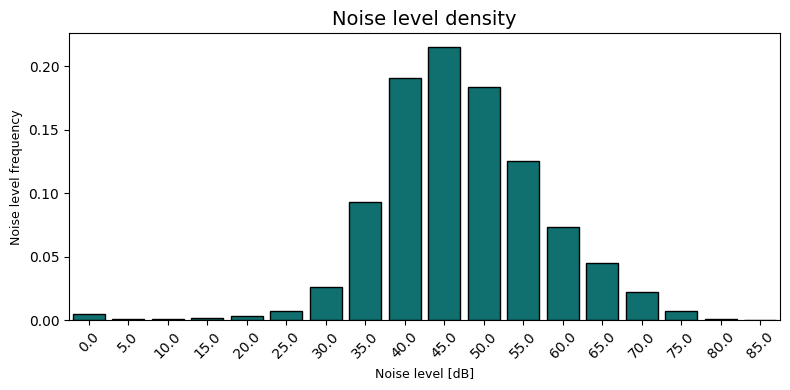

In [7]:
noise_density_plot(noise)

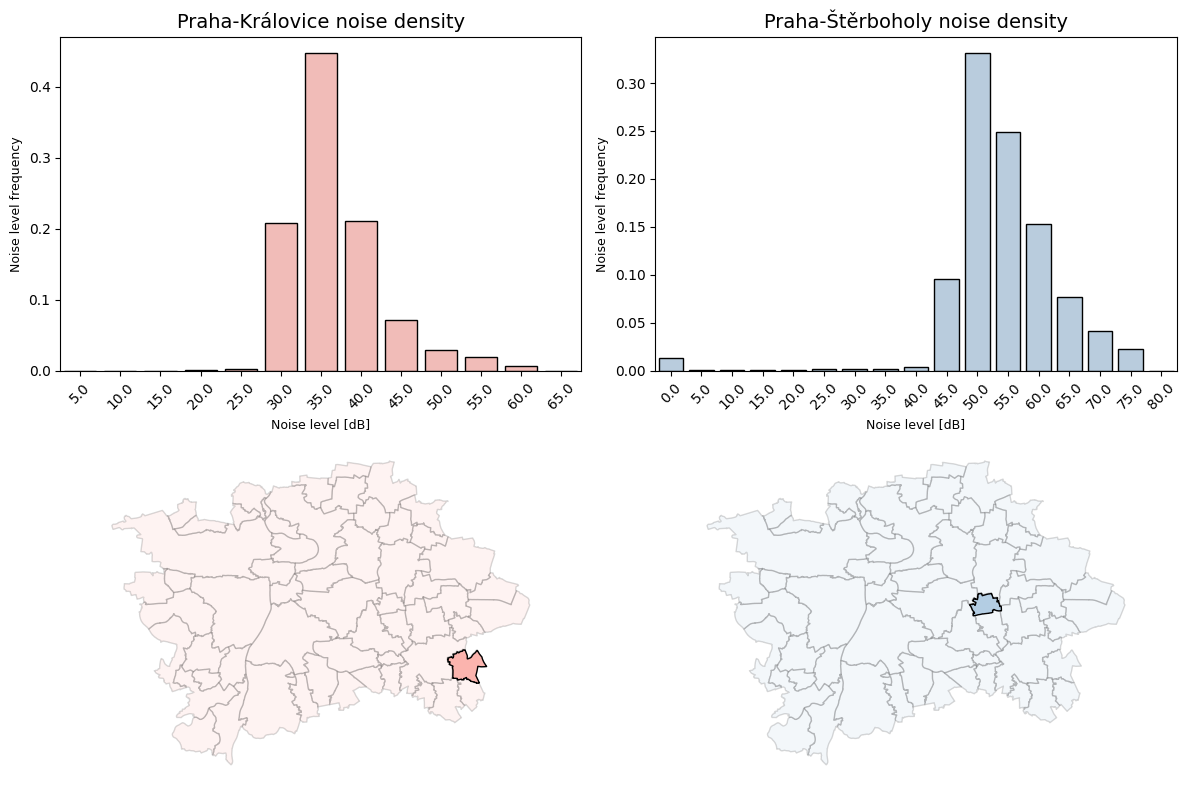

In [8]:
districts_noise_density_plot(noise, DISTRICTS, 'Praha-Štěrboholy', 'Praha-Královice')

In [7]:
from pysal.explore import esda
from pysal.lib import weights

w = weights.KNN.from_dataframe(noise)
w.transform = 'R'
morans_i = esda.Moran(noise['DB_LO'], w)

print(f"Moran's I: {morans_i.I}")
print(f"Z-statystyka: {morans_i.z_sim}")
print(f"P-wartość: {morans_i.p_sim}")

Moran's I: 0.22084623323013416
Z-statystyka: 1.405317005945551
P-wartość: 0.101


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.22', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.22)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

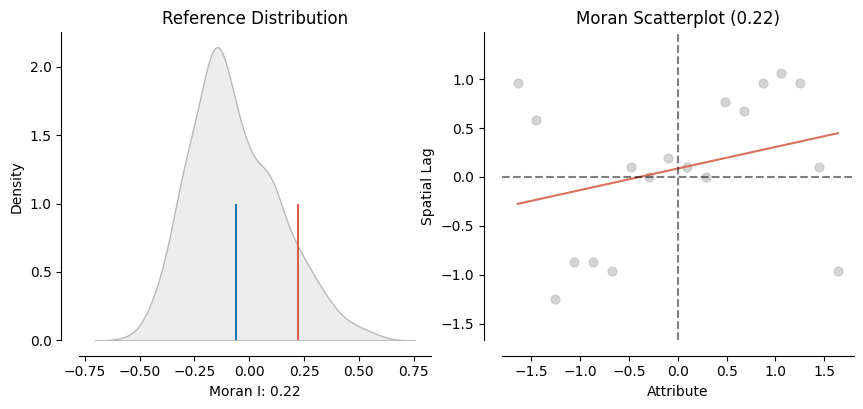

In [9]:
plot_moran(morans_i)